# Direct Digital Synthesis

Read pages 1-4 of this article http://www.analog.com/media/en/training-seminars/tutorials/MT-085.pdf for information DDS.

In [ ]:
import magma as m
m.set_mantle_target("ice40")
from loam.boards.icestick import IceStick

N = 8

icestick = IceStick()
# TODO: configure parts (Clock and GPIO)

In [ ]:
main = icestick.main()
# TODO: Define main
m.EndDefine()

In [ ]:
m.compile('build/dds', main)

In [ ]:
%%bash
cd build
cat sin.pcf
yosys -q -p 'synth_ice40 -top main -blif dds.blif' dds.v
arachne-pnr -q -d 1k -o dds.txt -p dds.pcf dds.blif 
icepack dds.txt dds.bin
iceprog dds.bin

Wire up the GPIO pins to a logic analyzer to verify that the circuit produces the correct waveform.

![](images/dds.png)

You can use Saleae's [export data](https://support.saleae.com/hc/en-us/articles/115005986806-Saving-Loading-and-Exporting-Data) feature to output a [csv file](data/dds-capture.csv). Replace our example data in `data/dds-capture.csv` to plot the results.

In [1]:
import csv
import magma as m
with open("data/dds-capture.csv") as sine_capture_csv:
    csv_reader = csv.reader(sine_capture_csv)
    next(csv_reader, None)  # skip the headers
    rows = [row for row in csv_reader]
timestamps = [float(row[0]) for row in rows]
values = [m.bitutils.seq2int(tuple(int(x) for x in row[1:])) for row in rows]

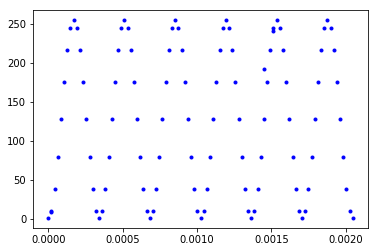

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(timestamps[:100], values[:100], "b.")